# Prev

## include

In [3]:
include("../../../src/struct_data.jl")
include("../../../src/neighbor.jl")
include("../../../src/forces/forces.jl")
include("../../../src/run_event.jl")

RunFusionAggregates (generic function with 1 method)

## model

In [4]:
@time model = ModelSet(
    TimeModel(
        tₛᵢₘ  = 150000.0,
        dt    = 0.5,
        nₖₙₙ  = 100,
        nₛₐᵥₑ = 50
    ),
    InputModel(
        outer_ratio = 0.8,
        path_input  = "../../data/init/Sphere"
    ),
    OutputModel(
        name_output = "Test_1",
        path_output = ""
    ) 
)

check_data("Test.xyz")

  0.000000 seconds (4 allocations: 144 bytes)


# Run

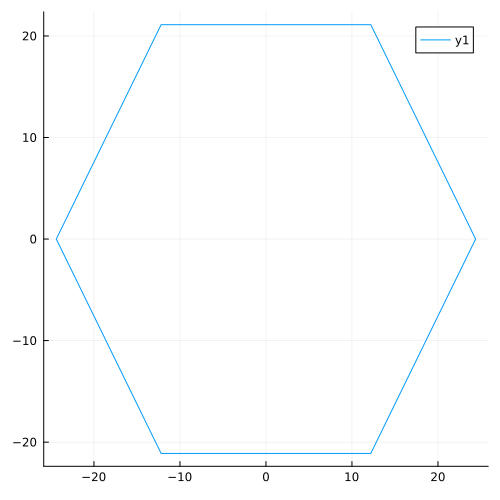

In [5]:
using Plots
init = Float32.(readdlm("init_stable.xyz")[3:end,2:end]) 

r = find_radius(init)
pos = vcat([[2r*cos(i) 2r*sin(i)] for i=collect(0:60:360)*pi/180]...)
plot(pos[:,1],pos[:,2],size = (500,500))

In [6]:
Par1, Par2 = Cubic(0.0055,2.0,4.5), ContractilePar(0.164);

agg = nothing
agg = Aggregate(
    [AggType(
        "HEK_1", 
        InteractionPar(Par1, Par2),
        init |> cu
    )], 
    [AggLocation("HEK_1",vcat(pos[i,:],0)') for i=1:size(pos,1)],
    model
)

Aggregate(AggType[AggType("HEK_1", InteractionPar(Cubic{Float64}(0.0055, 2.0, 4.5), ContractilePar(0.164)), 12.189157f0, Float32[-5.8861017 -4.799863 -8.264273; 1.0154873 -5.753389 -9.426559; … ; 3.3784163 3.3059669 9.768439; 6.8377233 4.1324844 8.079775], CuArray{Float32, 2, CUDA.Mem.DeviceBuffer})], AggIndex([1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  7, 7, 7, 7, 7, 7, 7, 7, 7, 7], ["HEK_1", "HEK_1", "HEK_1", "HEK_1", "HEK_1", "HEK_1", "HEK_1", "HEK_1", "HEK_1", "HEK_1"  …  "HEK_1", "HEK_1", "HEK_1", "HEK_1", "HEK_1", "HEK_1", "HEK_1", "HEK_1", "HEK_1", "HEK_1"]), Float32[18.49221 -4.799863 -8.264273; 25.3938 -5.753389 -9.426559; … ; 27.75673 3.3059669 9.768439; 31.216036 4.1324844 8.079775], AggGeometry(Float32[12.189157, 12.189157, 12.189157, 12.189157, 12.189157, 12.189157, 12.189157, 12.189157, 12.189157, 12.189157  …  12.189157, 12.189157, 12.189157, 12.189157, 12.189157, 12.189157, 12.189157, 12.189157, 12.189157, 12.189157

In [9]:
run_test(agg, model,"Run Complex Aggregate")

Run Complex Aggregate... 100%|███████████████████████████| Time: 0:08:5439m


In [ ]:
# open("Toto.xyz", "a") do f
#     write(f, "TEST\n")
#     write(f, "t=1\n")
#     writedlm(f,hcat(agg.Geometry.outline,agg.Position), ' ')
# end